In [1]:
import cv2  #이미지 처리
import matplotlib.pyplot as plt #이미지 시각화

import tensorflow_datasets as tfds #사진을 가져오는 라이브러리
import tensorflow as tf #딥러닝 모델을 만들기 위해 필요한 라이브러리



In [4]:
data_train,ds_info=tfds.load('cats_vs_dogs',split=[tfds.Split.TRAIN],with_info=True)
ds_info



tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='/root/tensorflow_datasets/cats_vs_dogs/4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul

In [5]:
images= [one['image'].numpy() for one in data_train[0].take(30)]
len(images)

30

(-0.5, 319.5, 239.5, -0.5)

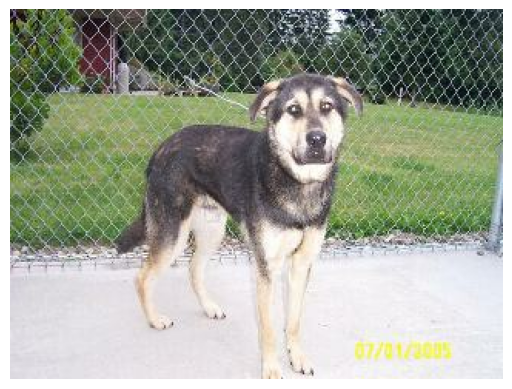

In [10]:
plt.imshow(images[29])
plt.axis('off')

In [ ]:
resnet50_pre= tf.keras.applications.resnet.ResNet50(weights='imagenet', input_shape=(224, 224,3))
resnet50_pre.summary()  #resnet이라는 인공지능 모델 사용

In [16]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [18]:
def pred_img(img):
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  img_resized= cv2.resize(img, (224,224))
  pred= resnet50_pre.predict(img_resized.reshape([1, 224,224, 3]))
  decoded_pred= decode_predictions(pred)

  for i ,instance in enumerate(decoded_pred[0]):
    print('{}위: {} ({:.2f}%)'.format(i+1,instance[1],instance[2]*100))


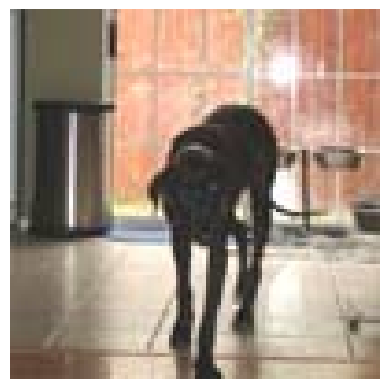

1/1 [==============================] - 1s 611ms/step
1위: Great_Dane (48.84%)
2위: redbone (28.99%)
3위: tusker (4.38%)
4위: Weimaraner (3.46%)
5위: bloodhound (2.59%)


In [21]:
pred_img(images[5])